Add your import statements and the database connection statements in the below code block

In [7]:
#your code here
# Pandas for data handling.
# Geopandas extends pandas and adds handling and plotting of geographic data.
# Matplotlib for display and rendering
import geopandas as gpd
import pysal as ps
import pandas as pd
import numpy as np
import libpysal as lps
import matplotlib.pyplot as plt
import esda
from pysal.lib import weights,examples

# Read in geopandas sample dataset of countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_228/3063166569.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### **Question 1**:  
Using the Libpysal Data, create a choropleth path of the United States that depicts the per capita income of each US state in 2009.

**Note:** 
* The Libpysal and GeoPandas libraries both contain utility functions that may make this task easier.
* The choropleth map should have the following parameters:
    - legend
    - Title should be '**Per Capita Income of US States on Choropleth Map**'
    - xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

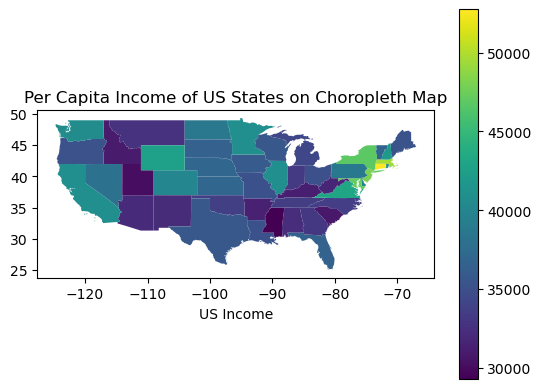

In [8]:
### TEST FUNCTION: test_question1
# DO NOT MODIFY OR REMOVE THE ABOVE LINE
# your code here
data = pd.read_csv(lps.examples.get_path("usjoin.csv"))
shape = gpd.read_file(lps.examples.get_path('us48.shx'))
shape = shape.sort_values('STATE_FIPS')
shape['per_capita'] = list(data["2009"])

# Plot the data
shape.plot(column='per_capita', legend=True)
plt.title('Per Capita Income of US States on Choropleth Map')
plt.xlabel('US Income')
plt.show()

### **Question 2**:
Again using the Libpysal Data, create a proportional symbol map showing a dot at the centroid of each state that is scaled to the per capita income of each US state in 2009.

**Note:** 
* The demonstration notebook for this unit contains code that performs a similar task and may be a useful reference for your assignment.
* The proportional symbol map should have the following parameters:
    * Title should be '**Proportional Symbol Map**'
    * xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

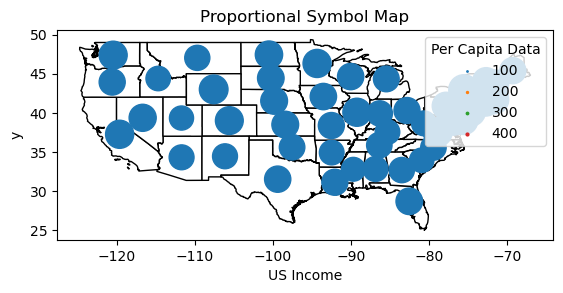

In [9]:
### TEST FUNCTION: test_question2
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here
data = pd.read_csv(lps.examples.get_path("usjoin.csv"))
shape = gpd.read_file(lps.examples.get_path('us48.shx'))
shape = shape.sort_values('STATE_FIPS')
shape['per_capita'] = list(data["2009"])

shape['centroid_column'] = shape.centroid

# Plot the data
centroids = list(shape['centroid_column'])
df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],
                   'x':[centroids[i].x for i in range(len(centroids))],
                   'data':list(shape['per_capita'])})

# Create a base plot showing the outlines of each country on the map.
base = shape.plot(color='white',edgecolor='black')

# Annotate the base plot with circles scaled to the size of the data.
df.plot(kind='scatter', x='x', y='y', s=df['data']*0.01, ax=base)

# Create a custom legend
legend_labels = [100, 200, 300, 400]  # Adjust these values as needed
legend_sizes = [label * 0.01 for label in legend_labels]

for size, label in zip(legend_sizes, legend_labels):
    base.scatter([], [], s=size, label=str(label))  # Use base.scatter to create empty plots

# Set legend title and position
plt.legend(title='Per Capita Data', loc='upper right')

# Show the plot in the notebook.
plt.title('Proportional Symbol Map')
plt.xlabel('US Income')
plt.show()

### **Question 3**:
Using the same data, compute the value of Moran's I for the per capita income of each US state in 2009 using Rook Continuity. Report the value of I rounded to 4 decimal places (i.e. x.XXXX)

**Note:** 
* Use the `esda` library to calculate the Moran's value.
* To calculate Moran’s I, you need two things: the value of interest (y) and a weight matrix (w).
* Print only the calculated Moran's value in the code cell below.
* There should only be one print statement in the below cell.

In [10]:
### TEST FUNCTION: test_question3
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here
y = shape['per_capita']
w = weights.Rook.from_shapefile(lps.examples.get_path("us48.shx"))
moran_stat = esda.Moran(y,w, two_tailed=False)
print (round(moran_stat.I, 4))

0.0407


/usr/lib/python3.11/site-packages/libpysal/cg/shapes.py:1394: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/lib/python3.11/site-packages/libpysal/cg/shapes.py:1123: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
